<a href="https://colab.research.google.com/github/ShubhamKNIT/learn-python/blob/main/notebooks/02_nn_classification_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Introduction to NN classification with TF

Classification problems:
- Binary Classification
- Multiclass Classification
- Multilabel Classification


## Generate Dataset

In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=7)

In [2]:
X

array([[-0.75681927, -0.27401115],
       [-0.48167671, -0.87409407],
       [-0.97024009, -0.25205207],
       ...,
       [ 0.744733  ,  0.33484256],
       [-0.78247498,  0.65396415],
       [-0.62324593,  0.84347736]])

In [3]:
y[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

### Let's try visualizing our data

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0" : X[:, 0], "X1" : X[:, 1], "y" : y});
circles

,X0,X1,y
0,-0.756819,-0.274011,1
1,-0.481677,-0.874094,0
2,-0.970240,-0.252052,0
3,-0.660944,-0.499074,1
4,-0.907931,0.408418,0
...,...,...,...
995,0.405450,0.694459,1
996,0.834156,-0.009121,1
997,0.744733,0.334843,1
998,-0.782475,0.653964,0


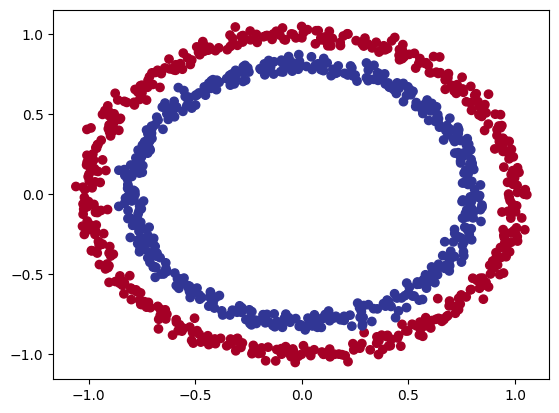

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [7]:
 X[:10], y[:10]

(array([[-0.75681927, -0.27401115],
        [-0.48167671, -0.87409407],
        [-0.97024009, -0.25205207],
        [-0.66094436, -0.49907384],
        [-0.90793058,  0.40841756],
        [ 0.41509873, -0.94636248],
        [-0.57674439, -0.58806687],
        [ 0.3842643 ,  0.9266862 ],
        [ 0.98037309, -0.14955743],
        [-0.56027967,  0.78041243]]),
 array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0]))

## Modelling

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state=7)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [10]:
import tensorflow as tf

In [71]:
tf.random.set_seed(7)

# Define the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Fit the model
history_1 = model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.4975
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4725
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4688
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5063
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.4950
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5050
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5150
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5163
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5163
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5163
Epoch 11/

In [72]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1262 - accuracy: 1.0000


[0.12616980075836182, 1.0]

In [73]:
y_preds_1 = model_1.predict(X_test)

7/7 [==============================] - 0s 3ms/step


## Visulizing Predictions

Let's create function `plot_decision_boundary()`:
- Take in a trained model, features(X), and labels(y)
- Create a meshgrid of the different X values
- Make predictions across the meshgrid
- Plot the predictions as well as a line between zones


In [14]:
import numpy as np

In [15]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X
    """

    # define the axis boundaries of the plot and create a meshgrid
    x0_min, x0_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x1_min, x1_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max, 100),
                           np.linspace(x1_min, x1_max, 100))


    # ravel() is used to squeeze the 2d arrays into 1d array
    # np.c_ is stack arrays horizontally
    x_in = np.c_[xx0.ravel(), xx1.ravel()]

    # make predictions
    y_pred = model.predict(x_in)

    # check for multi-class
    if (len(y_pred[0]) > 1):
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx0.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx0.shape)

    plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx0.min(), xx0.max())
    plt.ylim(xx1.min(), xx1.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


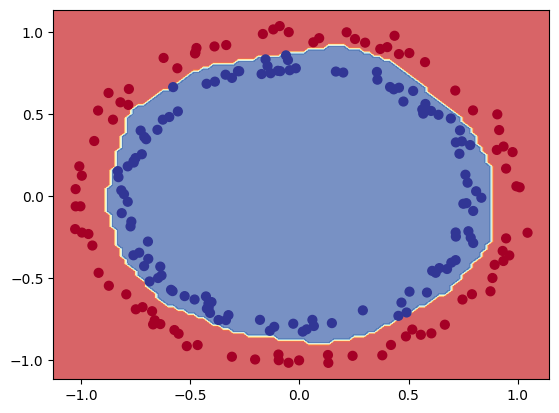

In [74]:
plot_decision_boundary(model_1,
                       X_test,
                       y_test)

In [17]:
x0_min, x0_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
x1_min, x1_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x0_min, x0_max, 100),
                     np.linspace(x1_min, x1_max, 100))
xx, yy

(array([[-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479],
        [-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479],
        [-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479],
        ...,
        [-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479],
        [-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479],
        [-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479]]),
 array([[-1.15174787, -1.15174787, -1.15174787, ..., -1.15174787,
         -1.15174787, -1.15174787],
        [-1.12852468, -1.12852468, -1.12852468, ..., -1.12852468,
         -1.12852468, -1.12852468],
        [-1.10530149, -1.10530149, -1.10530149, ..., -1.10530149,
         -1.10530149, -1.10530149],
        ...,
        [ 1.10090179,  1.10090179,  1.10090179, ...,  

## Replicating activation functions

In [18]:
def RELU(x):
    return tf.maximum(0, x);

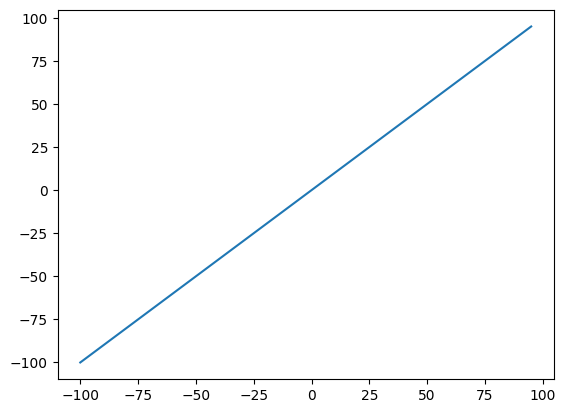

In [19]:
import numpy
x_ = tf.range(-100, 100, 5, dtype=tf.float32)
y_ = tf.range(-100, 100, 5, dtype=tf.float32)
plt.plot(x_, y_);

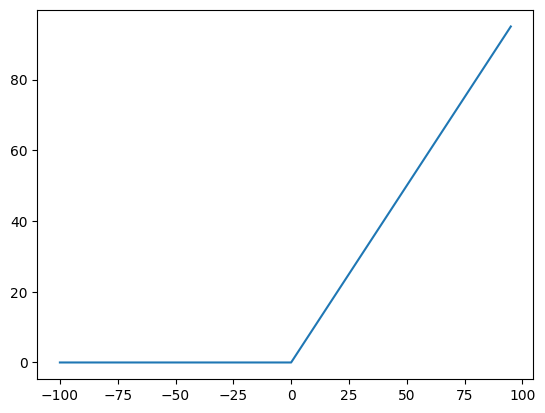

In [20]:
plt.plot(x_, RELU(y_));

In [21]:
def SIGMOID(x):
    return 1/(1 + tf.exp(-x));

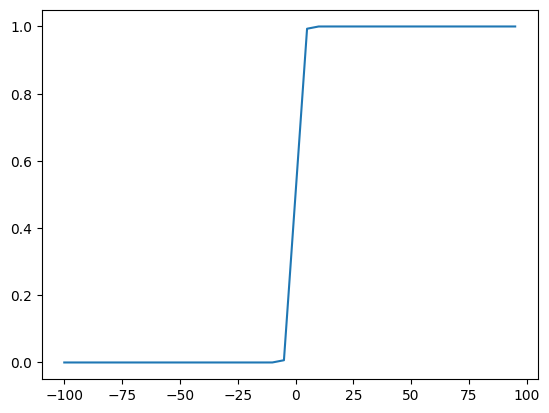

In [22]:
plt.plot(x_, SIGMOID(y_));

In [23]:
tf.random.set_seed(7)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='linear'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

history_2 = model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6910 - accuracy: 0.5263
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5375
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5537
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.5350
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.5500
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.5825
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.5650
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6450
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.6625
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.6725
Epoch 11/

In [24]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 0.9950


[0.11837059259414673, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classification


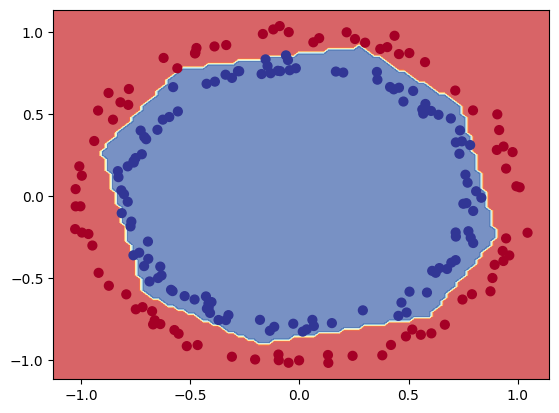

In [25]:
plot_decision_boundary(model_2, X_test, y_test)

In [26]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 15        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0, 0.5, 'loss')

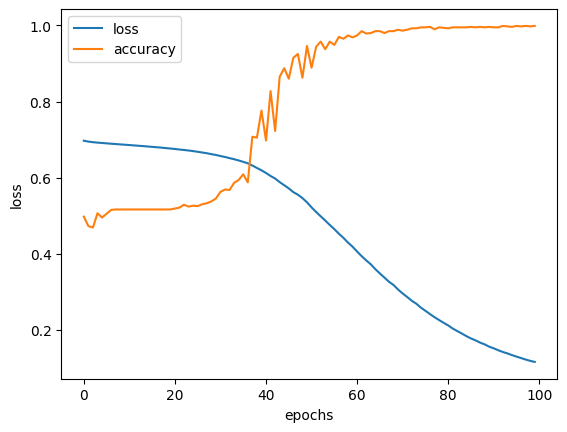

In [75]:
pd.DataFrame(history_1.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

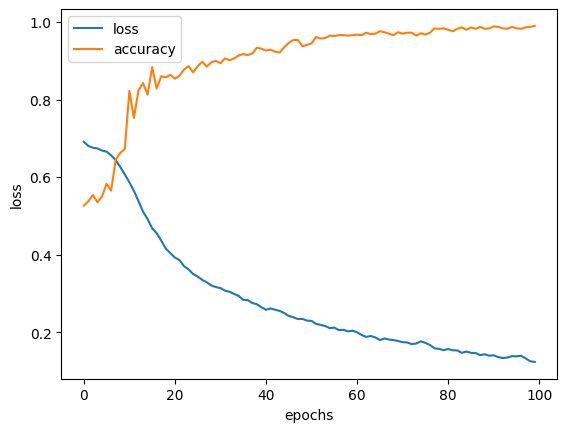

In [29]:
pd.DataFrame(history_2.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

## Comparing Models Side-by-Side

313/313 [==============================] - 2s 7ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


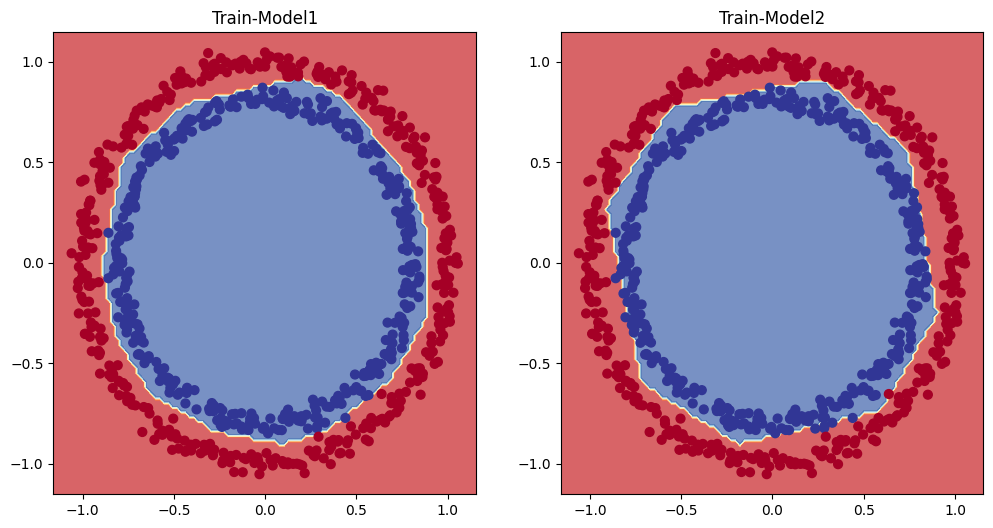

In [76]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train-Model1')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Train-Model2')
plot_decision_boundary(model_2, X_train, y_train)
plt.show();

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


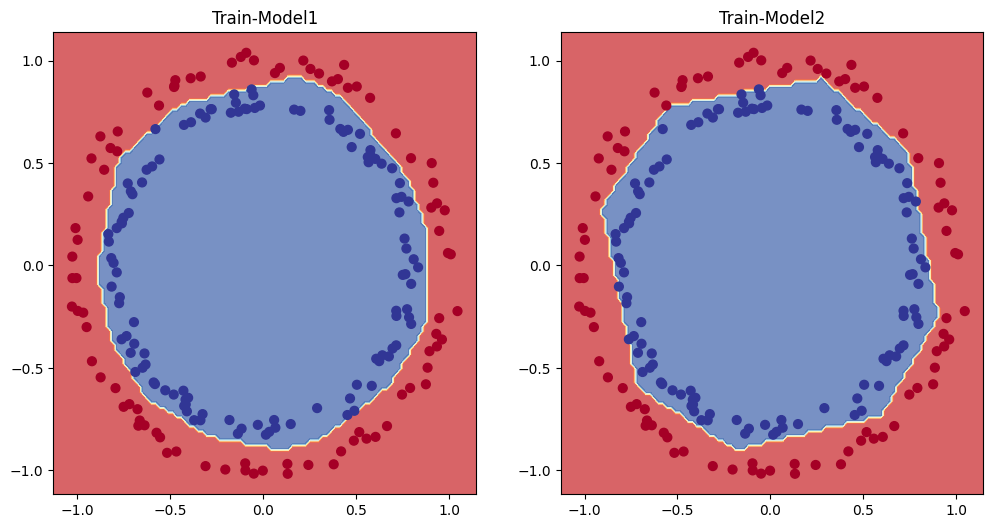

In [77]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train-Model1')
plot_decision_boundary(model_1, X_test, y_test)
plt.subplot(1, 2, 2)
plt.title('Train-Model2')
plot_decision_boundary(model_2, X_test, y_test)
plt.show();

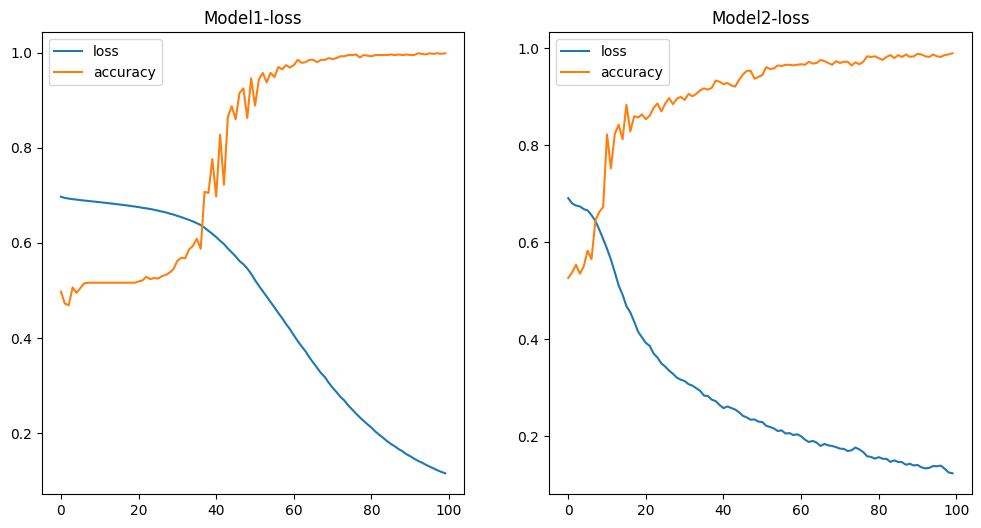

In [78]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['accuracy'])
plt.title('Model1-loss')
plt.legend(['loss', 'accuracy'])
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['accuracy'])
plt.title('Model2-loss')
plt.legend(['loss', 'accuracy'])
plt.show();

## Finding the best learning rate

- Introducing `learning rate callbacks` into the model
- Modified loss-curve plot

In [33]:
def scheduler(epoch, lr):
    return lr * tf.exp(-0.01)

lrs_cb = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

In [34]:
tf.random.set_seed(7)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = "Adam",
    metrics = ['accuracy']
)

history_3= model_3.fit(X_train, y_train, epochs = 100, callbacks=[lrs_cb])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7046 - accuracy: 0.4900 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.4900 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7038 - accuracy: 0.4925 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.4875 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.4863 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.4850 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.4888 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.4750 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

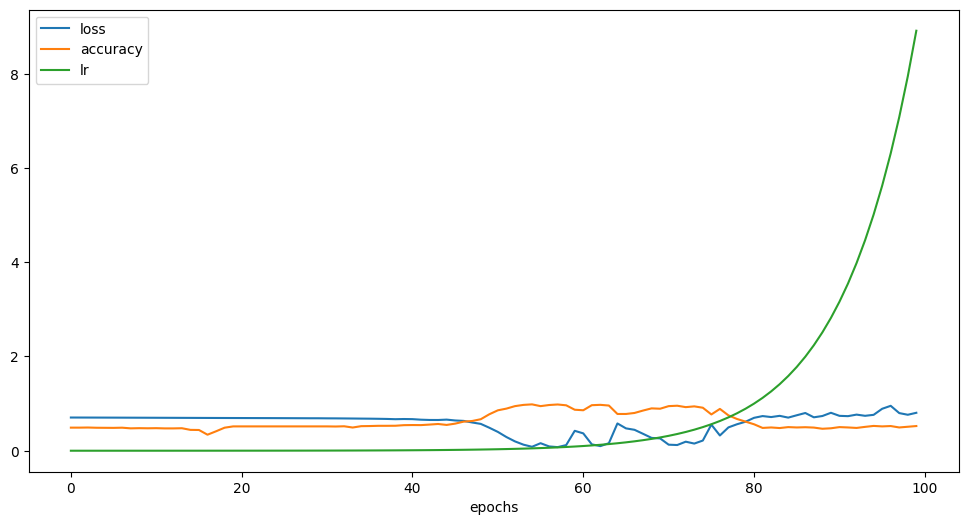

In [35]:
pd.DataFrame(history_3.history).plot(figsize=(12, 6), xlabel = 'epochs');

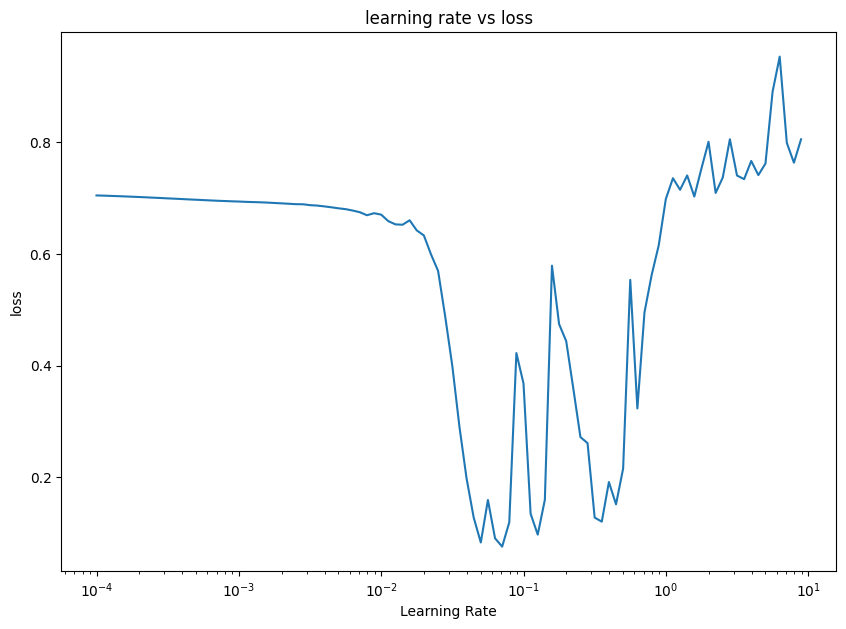

In [36]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_3.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('loss')
plt.title('learning rate vs loss');

In [37]:
def scheduler(epoch, lr):
    return lr * tf.exp(-0.01)


lrs_cb1 = tf.keras.callbacks.LearningRateScheduler(scheduler)

tf.random.set_seed(7)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='linear'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = "Adam",
    metrics = ['accuracy']
)

history_4= model_4.fit(X_train, y_train, epochs = 100, callbacks=[lrs_cb1])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7051 - accuracy: 0.4712 - lr: 9.9005e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.4938 - lr: 9.8020e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4888 - lr: 9.7045e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4938 - lr: 9.6079e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4863 - lr: 9.5123e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.4875 - lr: 9.4176e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.4963 - lr: 9.3239e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.4913 - lr: 9.2312e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

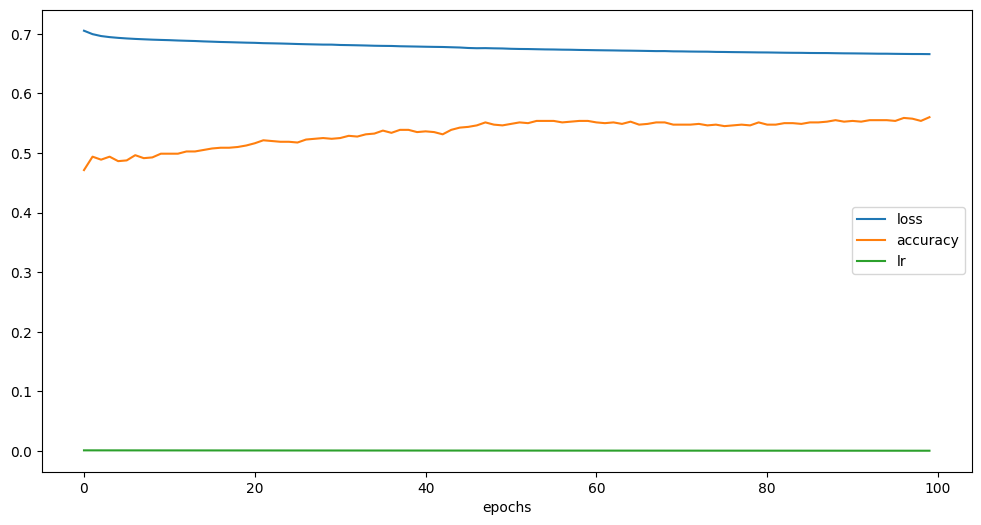

In [38]:
pd.DataFrame(history_4.history).plot(figsize=(12, 6), xlabel = 'epochs');

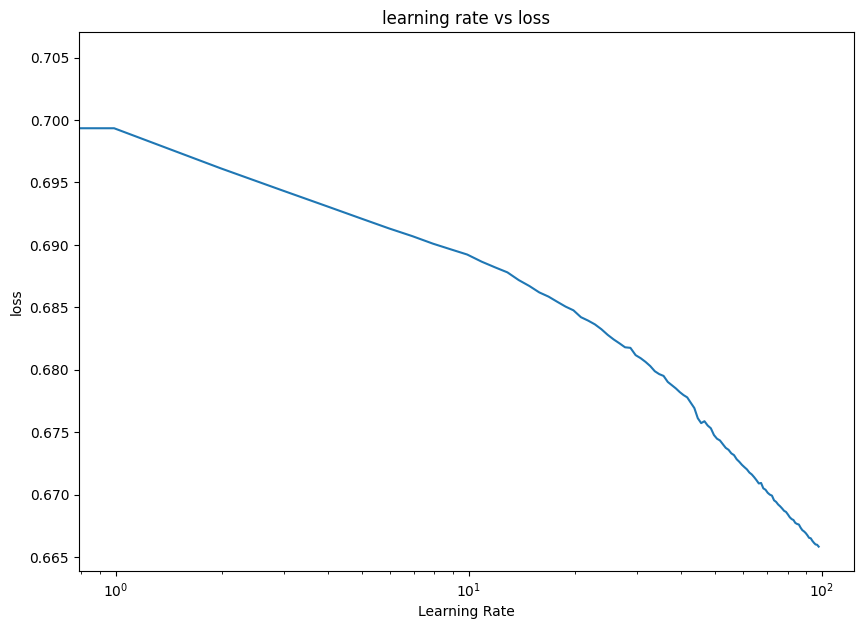

In [39]:
lrs1 = tf.range(100, dtype = tf.float32) * tf.exp(-0.01)
plt.figure(figsize = (10, 7))
plt.semilogx(lrs1, history_4.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('loss')
plt.title('learning rate vs loss');

### Trying model 3 ideal learning rate

In [40]:
tf.random.set_seed(7)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0282),
    metrics = ['accuracy']
)

history_5 = model_5.fit(X_train, y_train, epochs = 50)

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.6917 - accuracy: 0.5050
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.5925
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.6025
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.7175
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5489 - accuracy: 0.7688
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.9050
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2647 - accuracy: 0.9550
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9787
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.1081 - accuracy: 0.9850
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0900 - accuracy: 0.9750
Epoch 11/50
25/25 [

In [41]:
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9900


[0.02228240668773651, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


Text(0.5, 1.0, 'Test-Model5')

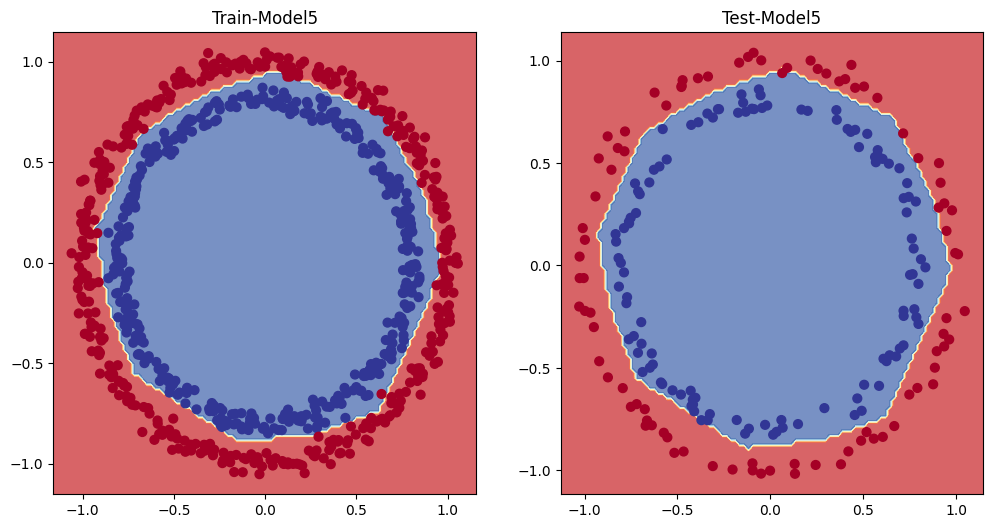

In [42]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_5, X_train, y_train)
plt.title('Train-Model5')
plt.subplot(1, 2, 2)
plot_decision_boundary(model_5, X_test, y_test)
plt.title('Test-Model5')

## Model Evaluation using different metrics
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix
- Classification Report (sklearn)

In [43]:
loss, accuracy = model_5.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9900
Loss: 0.02228240668773651, Accuracy: 99.00%


In [44]:
y_preds_5 = model_5.predict(X_test)

7/7 [==============================] - 0s 4ms/step


In [45]:
y_preds_5[:10]

array([[9.9998641e-01],
       [2.2876169e-08],
       [1.6861077e-03],
       [9.9994707e-01],
       [9.8500443e-01],
       [9.9596304e-01],
       [9.9999493e-01],
       [7.2353140e-02],
       [9.9999392e-01],
       [5.4242828e-06]], dtype=float32)

In [46]:
y_test[:10]

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, tf.round(y_preds_5))
cm

array([[ 86,   1],
       [  1, 112]])

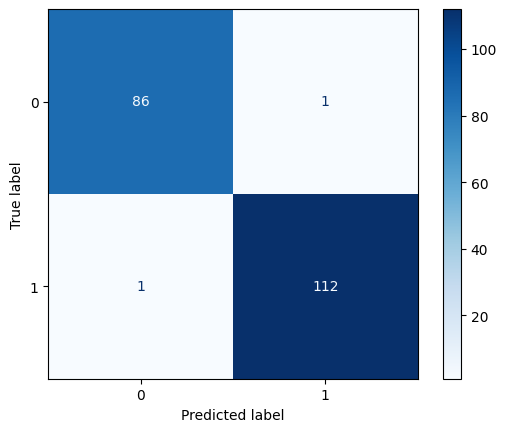

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, tf.round(y_preds_5), cmap='Blues')
plt.show()

## Working with multiclass

- We're going to use fashion mnnist dataset with tensorflow

In [49]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [50]:
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

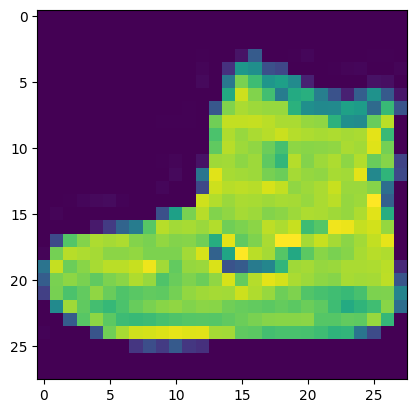

In [51]:
plt.imshow(train_data[0])

In [52]:
train_label[0]

9

Text(0.5, 1.0, '2')

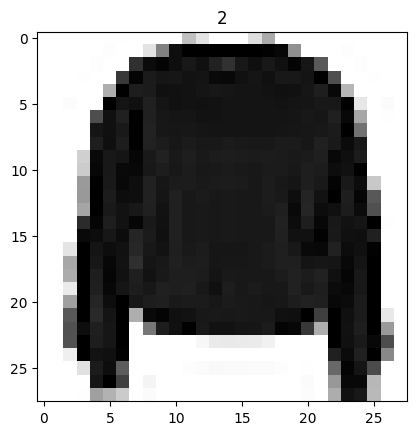

In [53]:
idx = 7
plt.imshow(train_data[idx], cmap=plt.cm.binary)
plt.title(train_label[idx])

In [54]:
# Mapping the label with their names
class_label = ['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [55]:
import random

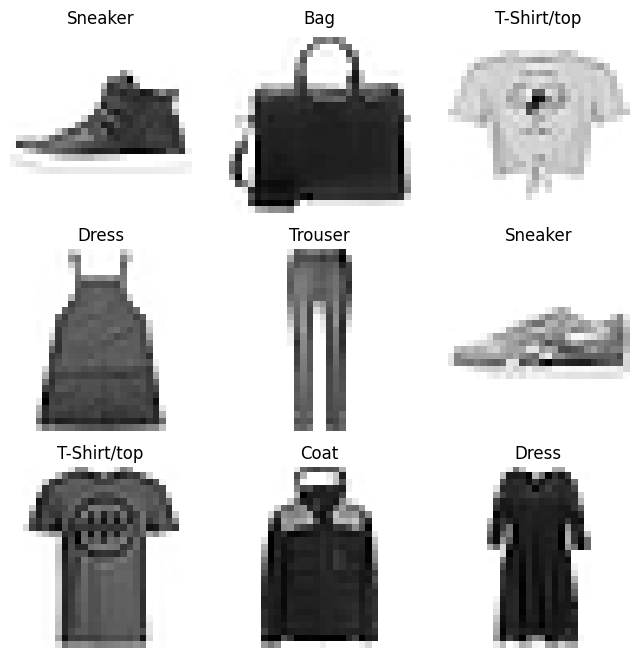

In [56]:
plt.figure(figsize=(8, 8))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    idx = random.choice(range(len(train_data)))
    plt.imshow(train_data[idx], cmap = plt.cm.binary)
    plt.title(class_label[train_label[idx]])
    plt.axis('off')

## Building Multi-Class Classification Model
- Similar architecture as BinaryClassification
Changes:
- In model activation of output layer = `softmax`
- In model loss use `SparseClassEntropy`

`Note`: Why not `CategoricalCrossEntropy`, because they work with multi-label classification or uses one-hot-encoding

`Note`: Fortunately enough we don't have to train-test split our datsets.
So, we can directly build our model

In [57]:
tf.random.set_seed(7)

# Flatten the data and then pass
model_im_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_im_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_im_1 = model_im_1.fit(train_data, train_label, epochs=10,
                              validation_data=(test_data, test_label))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4809 - accuracy: 0.1002 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2987 - accuracy: 0.0999 - val_loss: 2.2991 - val_accuracy: 0.1016
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2845 - accuracy: 0.1106 - val_loss: 2.2783 - val_accuracy: 0.1109
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2318 - accuracy: 0.1307 - val_loss: 2.0816 - val_accuracy: 0.1891
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.8734 - accuracy: 0.2182 - val_loss: 1.7456 - val_accuracy: 0.2488
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7203 - accuracy: 0.2589 - val_loss: 1.9180 - val_accuracy: 0.2710
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6748 - accuracy: 0.2652 - val_loss: 1.6459 - val_accuracy:

### Normalize the data

In [58]:
train_data.min(), train_data.max()

(0, 255)

In [59]:
train_data_norm = train_data/256.0
test_data_norm = test_data/256.0

In [60]:
train_data_norm.min(), train_data_norm.max()

(0.0, 0.99609375)

In [61]:
tf.random.set_seed(7)

# Flatten the data and then pass
model_im_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_im_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_im_2 = model_im_2.fit(train_data_norm, train_label, epochs=10,
                              validation_data=(test_data_norm, test_label))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.3396 - accuracy: 0.5268 - val_loss: 0.9980 - val_accuracy: 0.6706
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8980 - accuracy: 0.7082 - val_loss: 0.8592 - val_accuracy: 0.7071
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8206 - accuracy: 0.7186 - val_loss: 0.8183 - val_accuracy: 0.7172
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7872 - accuracy: 0.7215 - val_loss: 0.8066 - val_accuracy: 0.7246
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7704 - accuracy: 0.7244 - val_loss: 0.7943 - val_accuracy: 0.7045
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7603 - accuracy: 0.7265 - val_loss: 0.7816 - val_accuracy: 0.7275
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7517 - accuracy: 0.7294 - val_loss: 0.7694 - val_accuracy:

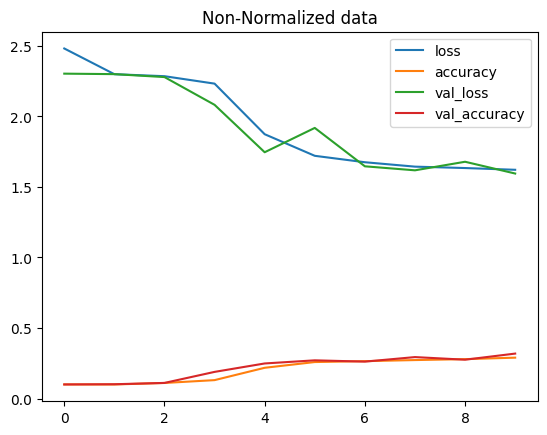

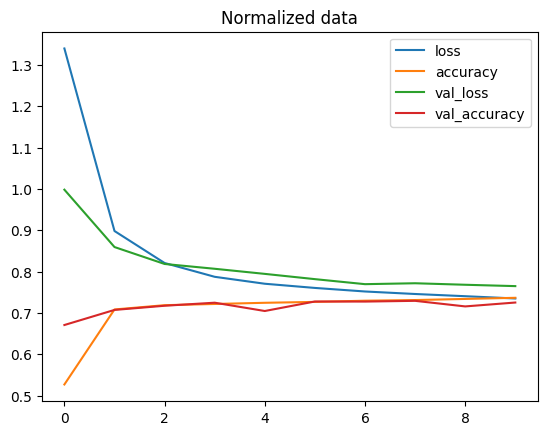

In [62]:
pd.DataFrame(history_im_1.history).plot(title='Non-Normalized data')
pd.DataFrame(history_im_2.history).plot(title='Normalized data');

`🔑 Note`: The NN with `normalized-data` with same architecture perform better than `non-normalized-data`. So, it's better to scale the data

### Let's Find the Ideal learning rate

In [63]:
lrs_im_3 = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [64]:
tf.random.set_seed(7)

model_im_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_im_3.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_im_3 = model_im_3.fit(train_data_norm, train_label, epochs = 10,
                           validation_data=(test_data_norm, test_label),
                           callbacks=[lrs_im_3])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3295 - accuracy: 0.5328 - val_loss: 0.8767 - val_accuracy: 0.7231 - lr: 9.9005e-04
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7543 - accuracy: 0.7430 - val_loss: 0.7052 - val_accuracy: 0.7549 - lr: 9.8020e-04
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6617 - accuracy: 0.7794 - val_loss: 0.6478 - val_accuracy: 0.7856 - lr: 9.7045e-04
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6140 - accuracy: 0.7987 - val_loss: 0.6305 - val_accuracy: 0.7941 - lr: 9.6079e-04
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5942 - accuracy: 0.8049 - val_loss: 0.6191 - val_accuracy: 0.8006 - lr: 9.5123e-04
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5822 - accuracy: 0.8069 - val_loss: 0.6073 - val_accuracy: 0.7997 - lr: 9.4176e-04
Epoch 7/10
1875/1875 [===========

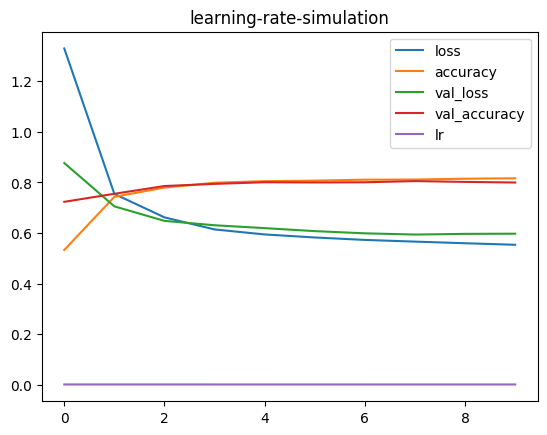

In [65]:
pd.DataFrame(history_im_3.history).plot(title='learning-rate-simulation');

In [66]:
lrs_im_4 = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * (10 ** (epoch/20))
)

tf.random.set_seed(7)

model_im_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_im_4.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_im_4 = model_im_4.fit(train_data_norm, train_label, epochs = 10,
                           validation_data=(test_data_norm, test_label),
                           callbacks=[lrs_im_4])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3618 - accuracy: 0.4995 - val_loss: 1.1062 - val_accuracy: 0.5926 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9689 - accuracy: 0.6578 - val_loss: 0.8739 - val_accuracy: 0.6818 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8023 - accuracy: 0.7025 - val_loss: 0.7926 - val_accuracy: 0.7013 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7290 - accuracy: 0.7507 - val_loss: 0.7319 - val_accuracy: 0.7598 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6738 - accuracy: 0.7752 - val_loss: 0.7159 - val_accuracy: 0.7575 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6516 - accuracy: 0.7794 - val_loss: 0.6755 - val_accuracy: 0.7798 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 7s

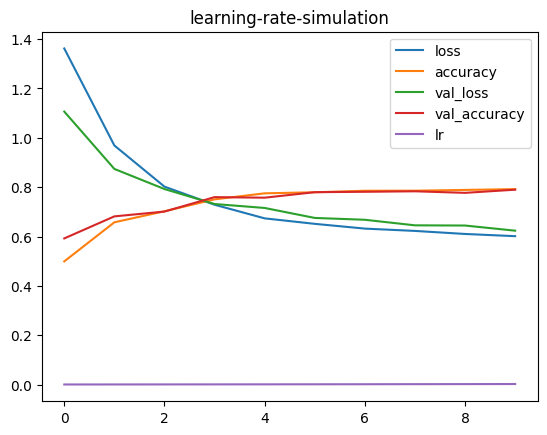

In [67]:
pd.DataFrame(history_im_4.history).plot(title='learning-rate-simulation');

In [79]:
tf.random.set_seed(7)

model_im_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_im_5.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

history_im_5 = model_im_5.fit(train_data_norm, train_label, epochs = 10,
                           validation_data=(test_data_norm, test_label))

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8085 - accuracy: 0.6991 - val_loss: 0.6224 - val_accuracy: 0.7804
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5637 - accuracy: 0.7970 - val_loss: 0.5558 - val_accuracy: 0.8064
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5186 - accuracy: 0.8193 - val_loss: 0.5278 - val_accuracy: 0.8215
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4867 - accuracy: 0.8340 - val_loss: 0.5183 - val_accuracy: 0.8265
Epoch 5/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4678 - accuracy: 0.8398 - val_loss: 0.5072 - val_accuracy: 0.8272
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4506 - accuracy: 0.8460 - val_loss: 0.4922 - val_accuracy: 0.8321
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4373 - accuracy: 0.8486 - val_loss: 0.4761 - val_accuracy:

In [80]:
tf.random.set_seed(7)

model_im_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_im_6.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0015),
    metrics = ['accuracy']
)

history_im_6 = model_im_6.fit(train_data_norm, train_label, epochs = 10,
                           validation_data=(test_data_norm, test_label))

Epoch 1/30
1875/1875 [==============================] - 10s 4ms/step - loss: 1.1731 - accuracy: 0.5347 - val_loss: 0.8581 - val_accuracy: 0.6854
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7748 - accuracy: 0.7173 - val_loss: 0.7566 - val_accuracy: 0.7350
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6999 - accuracy: 0.7489 - val_loss: 0.7088 - val_accuracy: 0.7488
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6550 - accuracy: 0.7653 - val_loss: 0.6731 - val_accuracy: 0.7610
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6358 - accuracy: 0.7697 - val_loss: 0.6628 - val_accuracy: 0.7643
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6243 - accuracy: 0.7727 - val_loss: 0.6496 - val_accuracy: 0.7650
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6149 - accuracy: 0.7745 - val_loss: 0.6523 - val_accuracy

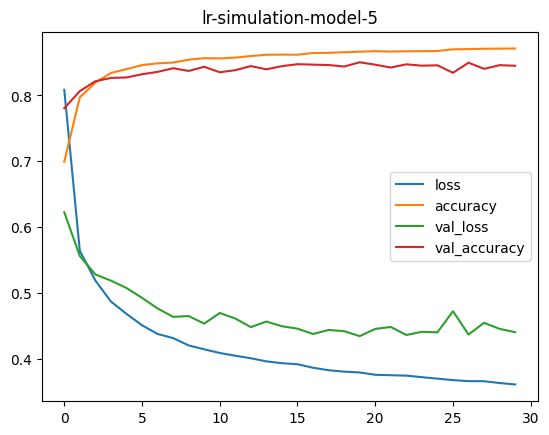

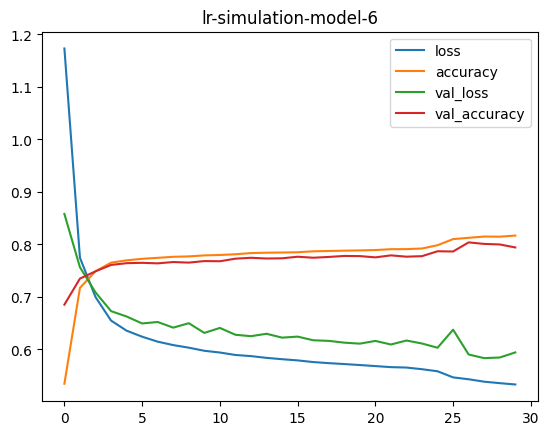

In [81]:
pd.DataFrame(history_im_5.history).plot(title='lr-simulation-model-5')
pd.DataFrame(history_im_6.history).plot(title='lr-simulation-model-6');

## Evaluating Multi-clasification model

In [82]:
y_preds_im_5 = model_im_5.predict(test_data)

313/313 [==============================] - 1s 4ms/step


In [83]:
y_preds_im_5

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99999994],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [84]:
y_preds_im_5[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)

### Converting the model ouput to useable

In [85]:
tf.argmax(y_preds_im_5[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [93]:
y_preds_im_arg_5 = [np.argmax(y_preds_im_5[i]) for i in range(len(y_preds_im_5))]

In [94]:
y_preds_im_arg_5

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 4,
 5,
 7,
 4,
 8,
 8,
 3,
 4,
 1,
 2,
 4,
 8,
 0,
 2,
 5,
 7,
 9,
 1,
 2,
 4,
 0,
 9,
 4,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 6,
 1,
 6,
 9,
 6,
 9,
 2,
 1,
 4,
 4,
 4,
 4,
 5,
 8,
 4,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 4,
 7,
 8,
 7,
 0,
 6,
 6,
 4,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 8,
 0,
 3,
 2,
 0,
 6,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 4,
 7,
 6,
 7,
 8,
 5,
 8,
 9,
 4,
 2,
 8,
 7,
 0,
 5,
 2,
 8,
 4,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 2,
 1,
 2,
 5,
 1,
 6,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 4,
 2,
 4,
 1,
 4,
 5,
 6,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 6,
 5,
 4,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 6,
 8,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 3,
 4,
 3,
 4,
 8,
 3,
 6,
 1,
 1,
 0,
 4,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 4,
 7,
 4,
 8,
 8,
 4,
 0,
 7,
 7,
 6,
 6,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 9,
 8,
 9,
 4,
 2,
 8,
 4,
 4,
 2,
 4,


In [96]:
y_preds_im_5[0], y_preds_im_arg_5[0]

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       dtype=float32),
 9)

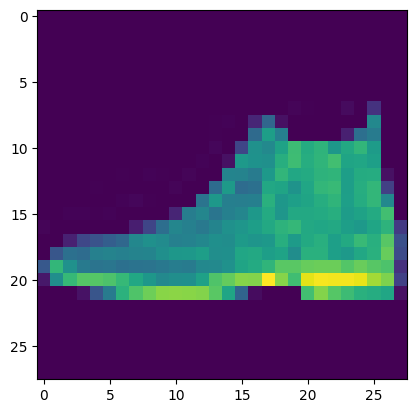

In [97]:
plt.imshow(test_data[0])

In [98]:
class_label[9]

'Ankle Boot'

### Plotting confusion matrix to visulaize the predictions

In [101]:
cm = confusion_matrix(test_label, y_preds_im_arg_5)
cm

array([[624,   6,  53,  27,  17,   0, 246,   0,  27,   0],
       [  1, 962,   8,  15,  11,   0,   0,   0,   3,   0],
       [  6,   5, 537,   4, 390,   0,  55,   0,   3,   0],
       [ 20,  29,  25, 712, 127,   0,  57,   0,  30,   0],
       [  0,   1,  29,   5, 940,   0,  16,   0,   9,   0],
       [  0,   0,   0,   1,   0, 652,   0,  33, 176, 138],
       [ 54,   0, 105,  15, 349,   0, 411,   0,  66,   0],
       [  0,   0,   0,   0,   0,  21,   0, 843,  10, 126],
       [  2,   0,   4,   3,  19,   1,   6,   2, 961,   2],
       [  0,   0,   0,   0,   0,   2,   1,  12,   3, 982]])

In [159]:
def plot_confusion_matrix(y_true, y_pred, class_label=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,10))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                        display_labels=class_label)
    disp.plot(include_values=False, cmap='Blues', ax=plt.gca(),
            colorbar=False)

    for i in range(len(cm)):
        for j in range(len(cm)):
            value = cm[i][j]
            percentage = value/sum(cm[i]) * 100 if sum(cm[i]) != 0 else 0.0
            plt.text(j, i, f"{value} ({percentage:.2f}%)",
                    ha='center', va='center',
                    fontweight='bold',
                    fontsize=7)

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show();

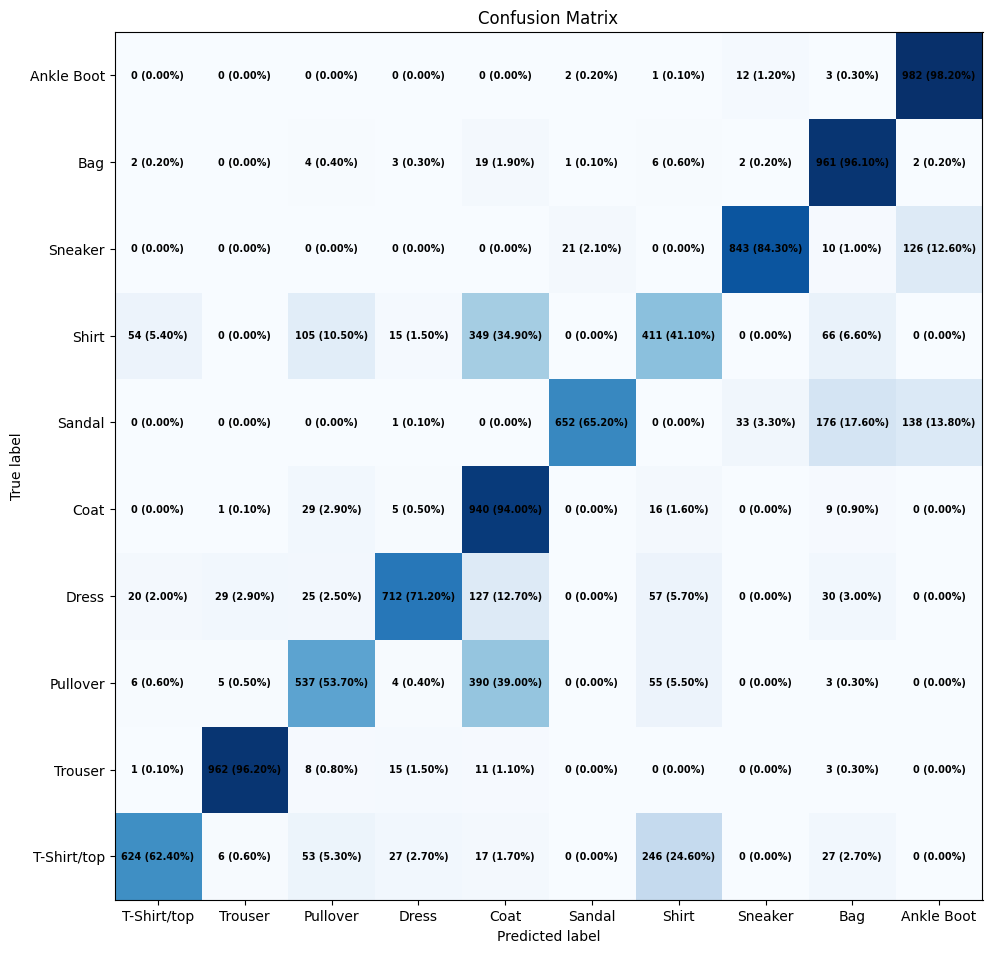

In [160]:
plot_confusion_matrix(test_label, y_preds_im_arg_5, class_label=class_label)

In [168]:
def plot_random_image(model, images, true_labels, class_label):

    # picking random image index
    i = random.randint(0, len(images))

    # Creating prediction and images
    target_image = images[i]
    pred_prob = model.predict(target_image.reshape(1, 28, 28))
    pred_label = class_label[pred_prob.argmax()]
    true_label = class_label[true_labels[i]]

    # plot the image
    plt.imshow(target_image, cmap='binary')

    # Change the color of prediction based on truth
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("Pred : {} {:2.0f}% (True: {})".format(pred_label,
                                                      100*tf.reduce_max(pred_prob),
                                                      true_label),
               color=color);

1/1 [==============================] - 0s 34ms/step


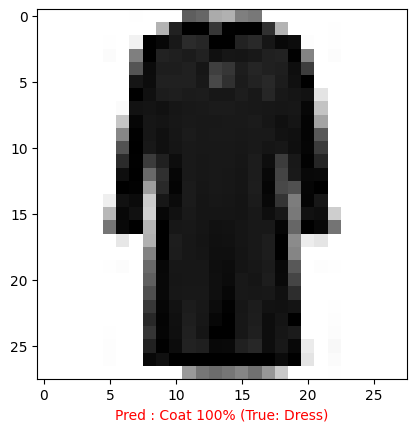

In [171]:
plot_random_image(model_im_5, test_data, test_label, class_label)

## What patterns is our model learning?

In [173]:
model_im_5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 10)                7850      
                                                                 
 dense_37 (Dense)            (None, 5)                 55        
                                                                 
 dense_38 (Dense)            (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [174]:
model_im_5.layers

In [180]:
weights, biases = model_im_5.layers[1].get_weights()

In [183]:
weights, weights.shape

(array([[ 0.7678909 ,  0.8103924 , -0.17189296, ...,  0.1565161 ,
         -0.5300224 , -0.94412917],
        [ 0.7009406 ,  0.3915055 , -1.2798126 , ..., -1.214818  ,
         -0.3299511 ,  0.20137633],
        [ 0.0387313 , -0.1225762 , -0.7880989 , ..., -0.534714  ,
         -0.99883103,  0.8966829 ],
        ...,
        [ 0.3339605 , -0.6461579 ,  0.54839855, ..., -0.19556947,
         -0.78137517,  0.01025609],
        [ 0.10781135, -0.55915165,  0.7869654 , ...,  0.5035617 ,
         -0.75304294, -0.01671081],
        [ 0.49926978, -0.15719734, -0.2128714 , ..., -0.13186991,
         -1.0755589 ,  1.421747  ]], dtype=float32),
 (784, 10))

In [184]:
biases, biases.shape

(array([ 1.0008373 ,  0.46325007,  0.42015526, -0.46459457,  1.1859384 ,
         0.46514535,  1.6799567 ,  0.17181475, -0.67266273,  0.43401802],
       dtype=float32),
 (10,))

## Plotting the model

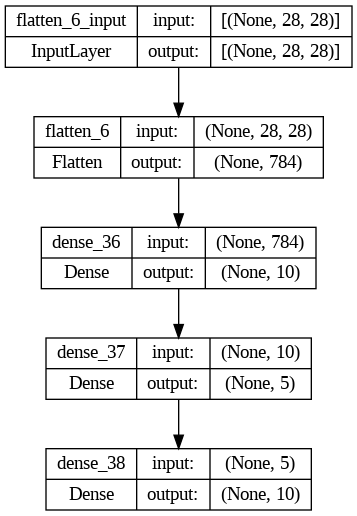

In [186]:
from tensorflow.keras.utils import plot_model
plot_model(model_im_5, show_shapes=True)